# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# set up lists to hold reponse info
citi=[]
lat = []
clouds=[]
temp = []
humidity=[]
pressure=[]
wind=[]
dat=[]
unit="metric"
base_url = "http://api.openweathermap.org/data/2.5/weather?"
#city='delhi'
citiid=1
f= open("weatherlog.txt","w+")
for city in cities:
    try:
        query_url = f"{base_url}q={city}&appid={api_key}&units={unit}"
        print(f"Processing Record {citiid} {city} of {len(cities)}")
        f.write("Processing Record " + str (citiid) + " of " + str(len(cities)) + " City Name - " + city +"\n")
        citiid=citiid+1
        response = requests.get(query_url).json()
        f.write(str(response) + "\n")
        pprint (response)
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        clouds.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        pressure.append(response['main']['pressure'])
        wind.append(response['wind']['speed'])
        #dat.append(response[main][dt])
        citi.append(city)
    except:
        print("City not found... skipping.")
        pass

#Indicate that Data Loading is complete
print("----------------------------")
print("Data Load Complete     ")


Processing Record 1 mar del plata of 623
{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': -46.43, 'lon': -67.52},
 'dt': 1546905413,
 'id': 3863379,
 'main': {'grnd_level': 979.58,
          'humidity': 44,
          'pressure': 979.58,
          'sea_level': 1000.23,
          'temp': 16.08,
          'temp_max': 16.08,
          'temp_min': 16.08},
 'name': 'Mar del Plata',
 'sys': {'country': 'AR',
         'message': 0.0036,
         'sunrise': 1546850931,
         'sunset': 1546907047},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 298, 'speed': 10.47}}
Processing Record 2 kloulklubed of 623
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 7.04, 'lon': 134.26},
 'dt': 1546901460,
 'id': 7671223,
 'main': {'humidity': 74,
          'pressure': 1013,
          'temp': 27,
          'temp_max': 27,
          'temp_min': 27},
 'nam

{'cod': '404', 'message': 'city not found'}
City not found... skipping.
Processing Record 15 abha of 623
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 18.22, 'lon': 42.5},
 'dt': 1546905600,
 'id': 110690,
 'main': {'humidity': 43,
          'pressure': 1025,
          'temp': 10.38,
          'temp_max': 11,
          'temp_min': 10},
 'name': 'Abha',
 'sys': {'country': 'SA',
         'id': 7412,
         'message': 0.004,
         'sunrise': 1546919017,
         'sunset': 1546958972,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 66.0002, 'speed': 0.87}}
Processing Record 16 bethel of 623
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 60.79, 'lon': -161.76},
 'dt': 1546904040,
 'id': 5880568,
 'main': {'humidity': 86,
          'pressure': 1011,
          'temp': -14.95,
          'temp

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.21, 'lon': 138.6},
 'dt': 1546905390,
 'id': 2069194,
 'main': {'grnd_level': 969.45,
          'humidity': 65,
          'pressure': 969.45,
          'sea_level': 1027.1,
          'temp': 23.76,
          'temp_max': 23.76,
          'temp_min': 23.76},
 'name': 'Jamestown',
 'sys': {'country': 'AU',
         'message': 0.0032,
         'sunrise': 1546803901,
         'sunset': 1546855125},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 237.5, 'speed': 2.42}}
Processing Record 29 yar-sale of 623
{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 66.83, 'lon': 70.83},
 'dt': 1546905460,
 'id': 1486321,
 'main': {'grnd_level': 1010.3,
          'humidity': 86,
          'pressure': 1010.3,
          'sea_level': 1011.54,
          'temp': -23.25,
          'temp_max': -23.25,
          

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': 70.62, 'lon': 147.9},
 'dt': 1546905463,
 'id': 2126123,
 'main': {'grnd_level': 1025.14,
          'humidity': 53,
          'pressure': 1025.14,
          'sea_level': 1027.55,
          'temp': -35.15,
          'temp_max': -35.15,
          'temp_min': -35.15},
 'name': 'Chokurdakh',
 'sys': {'country': 'RU', 'message': 0.0034, 'sunrise': 0, 'sunset': 0},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 303.5, 'speed': 1.32}}
Processing Record 43 punta arenas of 623
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -53.16, 'lon': -70.91},
 'dt': 1546902000,
 'id': 3874787,
 'main': {'humidity': 71,
          'pressure': 987,
          'temp': 10,
          'temp_max': 10,
          'temp_min': 10},
 'name': 'Punta Arenas',
 'sys': {'country': 'CL',
         'id': 8487,
         '

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 18.69, 'lon': 12.92},
 'dt': 1546905434,
 'id': 2446796,
 'main': {'grnd_level': 973.99,
          'humidity': 48,
          'pressure': 973.99,
          'sea_level': 1034.48,
          'temp': 6.18,
          'temp_max': 6.18,
          'temp_min': 6.18},
 'name': 'Bilma',
 'sys': {'country': 'NE',
         'message': 0.0033,
         'sunrise': 1546839768,
         'sunset': 1546879623},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 353, 'speed': 2.12}}
Processing Record 56 taolanaro of 623
{'cod': '404', 'message': 'city not found'}
City not found... skipping.
Processing Record 57 khani of 623
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 41.96, 'lon': 42.96},
 'dt': 1546905600,
 'id': 610864,
 'main': {'humidity': 93,
          'pressure': 1019,
          'temp': 2,
          'te

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 60.37, 'lon': 93.04},
 'dt': 1546907202,
 'id': 1492566,
 'main': {'grnd_level': 968.07,
          'humidity': 67,
          'pressure': 968.07,
          'sea_level': 1013.6,
          'temp': -12.62,
          'temp_max': -12.62,
          'temp_min': -12.62},
 'name': 'Severo-Yeniseyskiy',
 'sys': {'country': 'RU',
         'message': 0.0099,
         'sunrise': 1546915705,
         'sunset': 1546938036},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 239.5, 'speed': 3.32}}
Processing Record 70 ahuimanu of 623
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 21.44, 'lon': -157.84},
 'dt': 1546901820,
 'id': 5856516,
 'main': {'humidity': 66,
          'pressure': 1019,
          'temp': 27.26,
          'temp_max': 28.3,
          'temp_min': 25.6},
 'name': 'Ahuimanu',
 'sys': {

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 10.24, 'lon': -61.45},
 'dt': 1546902000,
 'id': 3573739,
 'main': {'humidity': 78,
          'pressure': 1014,
          'temp': 26,
          'temp_max': 26,
          'temp_min': 26},
 'name': 'Esperance',
 'sys': {'country': 'TT',
         'id': 8810,
         'message': 0.0036,
         'sunrise': 1546856738,
         'sunset': 1546898359,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 100, 'speed': 3.1}}
Processing Record 84 nichinan of 623
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 31.65, 'lon': 131.31},
 'dt': 1546905600,
 'id': 1855476,
 'main': {'humidity': 100,
          'pressure': 1023,
          'temp': 9.39,
          'temp_max': 11,
          'temp_min': 8},
 'name': 'Nichinan',
 'sys': {'country': 'JP',
         'id': 80

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 71.98, 'lon': 102.47},
 'dt': 1546905406,
 'id': 2022572,
 'main': {'grnd_level': 1001.95,
          'humidity': 75,
          'pressure': 1001.95,
          'sea_level': 1007.37,
          'temp': -27.47,
          'temp_max': -27.47,
          'temp_min': -27.47},
 'name': 'Khatanga',
 'sys': {'country': 'RU', 'message': 0.0029, 'sunrise': 0, 'sunset': 0},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 104, 'speed': 5.67}}
Processing Record 100 saleaula of 623
{'cod': '404', 'message': 'city not found'}
City not found... skipping.
Processing Record 101 iqaluit of 623
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 63.75, 'lon': -68.52},
 'dt': 1546904040,
 'id': 5983720,
 'main': {'humidity': 67,
          'pressure': 1018,
          'temp': -33,
          'temp_max': -33,
   

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 65.58, 'lon': -170.99},
 'dt': 1546905442,
 'id': 4031637,
 'main': {'grnd_level': 1027.57,
          'humidity': 95,
          'pressure': 1027.57,
          'sea_level': 1032.37,
          'temp': -17.47,
          'temp_max': -17.47,
          'temp_min': -17.47},
 'name': 'Lavrentiya',
 'sys': {'country': 'RU',
         'message': 0.006,
         'sunrise': 1546896482,
         'sunset': 1546911234},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 34.0002, 'speed': 11.12}}
Processing Record 113 saint-philippe of 623
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 45.36, 'lon': -73.48},
 'dt': 1546904100,
 'id': 6138908,
 'main': {'humidity': 64,
          'pressure': 1028,
          'temp': -12.27,
          'temp_max': -12,
          'temp_min': -13},
 'name': 'Saint-Philippe',
 'sys'

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 39.41, 'lon': -74.36},
 'dt': 1546905600,
 'id': 4500920,
 'main': {'humidity': 75,
          'pressure': 1029,
          'temp': 0.68,
          'temp_max': 2.2,
          'temp_min': 0},
 'name': 'Brigantine',
 'sys': {'country': 'US',
         'id': 3222,
         'message': 0.0052,
         'sunrise': 1546949857,
         'sunset': 1546984250,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 87.0002, 'speed': 3.02}}
Processing Record 126 hobart of 623
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -42.88, 'lon': 147.33},
 'dt': 1546903800,
 'id': 2163355,
 'main': {'humidity': 45,
          'pressure': 1008,
          'temp': 20,
          'temp_max': 20,
          'temp_min': 20},
 'name': 'Hobart',
 'sys': {'country': 'AU',
         'id'

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -3.22, 'lon': 40.12},
 'dt': 1546907215,
 'id': 187968,
 'main': {'grnd_level': 1020.35,
          'humidity': 93,
          'pressure': 1020.35,
          'sea_level': 1022.56,
          'temp': 26.56,
          'temp_max': 26.56,
          'temp_min': 26.56},
 'name': 'Malindi',
 'sys': {'country': 'KE',
         'message': 0.0033,
         'sunrise': 1546917423,
         'sunset': 1546961702},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 65.0002, 'speed': 5.92}}
Processing Record 139 superior of 623
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 39.95, 'lon': -105.17},
 'dt': 1546906500,
 'id': 5440838,
 'main': {'humidity': 34,
          'pressure': 1012,
          'temp': 7.75,
          'temp_max': 8,
          'temp_min': 7},
 'name': 'Superior',
 'sys': {'country': 'US',
   

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 34.64, 'lon': -120.46},
 'dt': 1546904100,
 'id': 5367788,
 'main': {'humidity': 72,
          'pressure': 1022,
          'temp': 16.29,
          'temp_max': 18.3,
          'temp_min': 15},
 'name': 'Lompoc',
 'sys': {'country': 'US',
         'id': 4558,
         'message': 0.0045,
         'sunrise': 1546873770,
         'sunset': 1546909668,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 190, 'speed': 3.6}}
Processing Record 155 vanimo of 623
{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': -2.67, 'lon': 141.3},
 'dt': 1546905420,
 'id': 2084442,
 'main': {'grnd_level': 1023.6,
          'humidity': 100,
          'pressure': 1023.6,
          'sea_level': 1023.7,
          'temp': 28.31,
          'temp_max': 28.31,
          'temp_min': 2

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 69.7, 'lon': 170.27},
 'dt': 1546905386,
 'id': 2122090,
 'main': {'grnd_level': 1025.3,
          'humidity': 85,
          'pressure': 1025.3,
          'sea_level': 1033.34,
          'temp': -28.62,
          'temp_max': -28.62,
          'temp_min': -28.62},
 'name': 'Pevek',
 'sys': {'country': 'RU', 'message': 0.0079, 'sunrise': 0, 'sunset': 0},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 135.5, 'speed': 2.72}}
Processing Record 170 galesong of 623
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -5.32, 'lon': 119.37},
 'dt': 1546905600,
 'id': 1644605,
 'main': {'humidity': 83,
          'pressure': 1012,
          'temp': 28,
          'temp_max': 28,
          'temp_min': 28},
 'name': 'Galesong',
 'sys': {'country': 'ID',
         'id': 9325,
         'message': 0.0035,
    

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': -34.72, 'lon': 135.86},
 'dt': 1546905388,
 'id': 2063036,
 'main': {'grnd_level': 1026.19,
          'humidity': 91,
          'pressure': 1026.19,
          'sea_level': 1029.78,
          'temp': 18.76,
          'temp_max': 18.76,
          'temp_min': 18.76},
 'name': 'Port Lincoln',
 'sys': {'country': 'AU',
         'message': 0.0032,
         'sunrise': 1546804327,
         'sunset': 1546856013},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 204, 'speed': 4.37}}
Processing Record 184 ballina of 623
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 54.11, 'lon': -9.15},
 'dt': 1546906940,
 'id': 2966778,
 'main': {'grnd_level': 1035.92,
          'humidity': 95,
          'pressure': 1035.92,
          'sea_level': 1046.6,
          'temp': 7.36,
          'temp_max': 7.36

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 37.63, 'lon': -1},
 'dt': 1546903800,
 'id': 2520058,
 'main': {'humidity': 93,
          'pressure': 1029,
          'temp': 9,
          'temp_max': 9,
          'temp_min': 9},
 'name': 'Cartagena',
 'rain': {'3h': 0.155},
 'sys': {'country': 'ES',
         'id': 6413,
         'message': 0.0041,
         'sunrise': 1546931959,
         'sunset': 1546966923,
         'type': 1},
 'visibility': 9000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 330, 'speed': 3.1}}
Processing Record 197 havre-saint-pierre of 623
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 50.23, 'lon': -63.6},
 'dt': 1546905600,
 'id': 5972291,
 'main': {'humidity': 55,
          'pressure': 1023,
          'temp': -14,
          'temp_max': -14,
          'temp_min': -14},
 'name': 'Havre-Saint-Pierre',
 'sys': 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 34.33, 'lon': 71.18},
 'dt': 1546905600,
 'id': 1165057,
 'main': {'humidity': 61,
          'pressure': 1020,
          'temp': 8.07,
          'temp_max': 8.1,
          'temp_min': 8},
 'name': 'Shinpokh',
 'sys': {'country': 'PK',
         'id': 7590,
         'message': 0.0031,
         'sunrise': 1546914131,
         'sunset': 1546950093,
         'type': 1},
 'visibility': 4000,
 'weather': [{'description': 'haze', 'icon': '50n', 'id': 721, 'main': 'Haze'}],
 'wind': {'deg': 230, 'speed': 2.1}}
Processing Record 209 jiayuguan of 623
{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 39.77, 'lon': 98.29},
 'dt': 1546907227,
 'id': 1280957,
 'main': {'grnd_level': 789.58,
          'humidity': 67,
          'pressure': 789.58,
          'sea_level': 1053.32,
          'temp': -23.3,
          'temp_max': -23.3,
          'temp_min': -23.3},
 'name': 'Jiayuguan',
 'sys': {'country':

              'main': 'Clouds'}],
 'wind': {'deg': 277, 'speed': 4.02}}
Processing Record 222 the valley of 623
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 18.22, 'lon': -63.06},
 'dt': 1546905600,
 'id': 3573374,
 'main': {'humidity': 69,
          'pressure': 1018,
          'temp': 24.4,
          'temp_max': 25,
          'temp_min': 24},
 'name': 'The Valley',
 'sys': {'country': 'AI',
         'id': 8801,
         'message': 0.0051,
         'sunrise': 1546944356,
         'sunset': 1546984318,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 90, 'speed': 5.1}}
Processing Record 223 pangkalanbuun of 623
{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': -2.68, 'lon': 111.62},
 'dt': 1546907230,
 'id': 1632694,
 'main': {'grnd_level': 1014.35,
          'humidity': 98,
          'press

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 30.69, 'lon': 78.49},
 'dt': 1546907232,
 'id': 1253628,
 'main': {'grnd_level': 784.47,
          'humidity': 76,
          'pressure': 784.47,
          'sea_level': 1035.61,
          'temp': -4.7,
          'temp_max': -4.7,
          'temp_min': -4.7},
 'name': 'Ginda',
 'sys': {'country': 'IN',
         'message': 0.0027,
         'sunrise': 1546911868,
         'sunset': 1546948845},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 30.0002, 'speed': 1.02}}
Processing Record 237 utiroa of 623
{'cod': '404', 'message': 'city not found'}
City not found... skipping.
Processing Record 238 noumea of 623
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -22.28, 'lon': 166.46},
 'dt': 1546905600,
 'id': 2139521,
 'main': {'humidity': 45,
          'pressure': 1011,
          'temp': 31,
     

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': -16.48, 'lon': -151.75},
 'dt': 1546905409,
 'id': 4034551,
 'main': {'grnd_level': 1024.65,
          'humidity': 100,
          'pressure': 1024.65,
          'sea_level': 1024.75,
          'temp': 28.51,
          'temp_max': 28.51,
          'temp_min': 28.51},
 'name': 'Faanui',
 'sys': {'country': 'PF',
         'message': 0.0042,
         'sunrise': 1546875726,
         'sunset': 1546922718},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 316.5, 'speed': 3.87}}
Processing Record 253 coaticook of 623
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 45.13, 'lon': -71.8},
 'dt': 1546905600,
 'id': 5924500,
 'main': {'humidity': 65,
          'pressure': 1028,
          'temp': -13.32,
          'temp_max': -12.5,
          'temp_min': -14},
 'name': 'Coaticook',
 'sys': {'countr

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -20.21, 'lon': 57.76},
 'dt': 1546902000,
 'id': 1106643,
 'main': {'humidity': 88,
          'pressure': 1013,
          'temp': 27,
          'temp_max': 27,
          'temp_min': 27},
 'name': 'Quatre Cocos',
 'sys': {'country': 'MU',
         'id': 2061,
         'message': 0.0087,
         'sunrise': 1546825004,
         'sunset': 1546872844,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'shower rain',
              'icon': '09n',
              'id': 521,
              'main': 'Rain'}],
 'wind': {'deg': 30, 'speed': 6.2}}
Processing Record 267 yantal of 623
{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 56.85, 'lon': 105.25},
 'dt': 1546907238,
 'id': 2055868,
 'main': {'grnd_level': 956.64,
          'humidity': 64,
          'pressure': 956.64,
          'sea_level': 1025.44,
          'temp': -11,
          'temp_max': -11,
          'temp_min': -11

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 26.2, 'lon': 90.29},
 'dt': 1546907240,
 'id': 1275641,
 'main': {'grnd_level': 1016.95,
          'humidity': 67,
          'pressure': 1016.95,
          'sea_level': 1027.34,
          'temp': 8.61,
          'temp_max': 8.61,
          'temp_min': 8.61},
 'name': 'Bilasipara',
 'sys': {'country': 'IN',
         'message': 0.0033,
         'sunrise': 1546908462,
         'sunset': 1546946584},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 0.500244, 'speed': 1.67}}
Processing Record 281 marsa matruh of 623
{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 31.35, 'lon': 27.25},
 'dt': 1546907240,
 'id': 352733,
 'main': {'grnd_level': 1013.38,
          'humidity': 67,
          'pressure': 1013.38,
          'sea_level': 1030.99,
          'temp': 9.11,
          'temp_max': 9.11,
     

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 31.8, 'lon': 34.94},
 'dt': 1546903200,
 'id': 6693679,
 'main': {'humidity': 53,
          'pressure': 1018,
          'temp': 11,
          'temp_max': 11,
          'temp_min': 11},
 'name': 'Gizo',
 'sys': {'country': 'IL',
         'id': 6845,
         'message': 0.0033,
         'sunrise': 1546836071,
         'sunset': 1546872752,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 180, 'speed': 7.7}}
Processing Record 295 houma of 623
{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 35.63, 'lon': 111.36},
 'dt': 1546907243,
 'id': 1784874,
 'main': {'grnd_level': 946.35,
          'humidity': 77,
          'pressure': 946.35,
          'sea_level': 1051.5,
          'temp': -10.45,
          'temp_max': -10.45,
          'temp_min': -

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 30.3, 'lon': -99.24},
 'dt': 1546905300,
 'id': 4696310,
 'main': {'humidity': 55,
          'pressure': 1019,
          'temp': 19.36,
          'temp_max': 20.6,
          'temp_min': 18.4},
 'name': 'Harper',
 'sys': {'country': 'US',
         'id': 5990,
         'message': 0.0096,
         'sunrise': 1546954473,
         'sunset': 1546991576,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 266, 'speed': 1.27}}
Processing Record 309 shimoda of 623
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 34.7, 'lon': 138.93},
 'dt': 1546902000,
 'id': 1852357,
 'main': {'humidity': 61,
          'pressure': 1017,
          'temp': 7.8,
          'temp_max': 10,
          'temp_min': 6},
 'name': 'Shimoda',
 'sys': {'country': 'JP',
         'id': 8070,

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 46.41, 'lon': -105.84},
 'dt': 1546901580,
 'id': 5666176,
 'main': {'humidity': 89,
          'pressure': 1006,
          'temp': 2.2,
          'temp_max': 2.2,
          'temp_min': 2.2},
 'name': 'Miles City',
 'sys': {'country': 'US',
         'id': 4930,
         'message': 0.0039,
         'sunrise': 1546872354,
         'sunset': 1546904069,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 270, 'gust': 9.8, 'speed': 8.2}}
Processing Record 322 miri of 623
{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 10.31, 'lon': 9.75},
 'dt': 1546905455,
 'id': 2347470,
 'main': {'grnd_level': 953.07,
          'humidity': 38,
          'pressure': 953.07,
          'sea_level': 1028.36,
          'temp': 13.71,
          'temp_max': 13.71,
   

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -45.41, 'lon': 167.72},
 'dt': 1546905401,
 'id': 2181625,
 'main': {'grnd_level': 967.5,
          'humidity': 56,
          'pressure': 967.5,
          'sea_level': 1031.72,
          'temp': 17.33,
          'temp_max': 17.33,
          'temp_min': 17.33},
 'name': 'Te Anau',
 'sys': {'country': 'NZ',
         'message': 0.0037,
         'sunrise': 1546794667,
         'sunset': 1546850365},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 294, 'speed': 2.57}}
Processing Record 336 tual of 623
{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -5.67, 'lon': 132.75},
 'dt': 1546906994,
 'id': 1623197,
 'main': {'grnd_level': 1023.27,
          'humidity': 98,
          'pressure': 1023.27,
          'sea_level': 1023.78,
          'temp': 29.31,
          'temp_max': 29.31,
          'temp

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 45.23, 'lon': 147.88},
 'dt': 1546907253,
 'id': 2123979,
 'main': {'grnd_level': 1013.14,
          'humidity': 100,
          'pressure': 1013.14,
          'sea_level': 1023.7,
          'temp': -3.05,
          'temp_max': -3.05,
          'temp_min': -3.05},
 'name': 'Kurilsk',
 'sys': {'country': 'RU',
         'message': 0.0052,
         'sunrise': 1546897619,
         'sunset': 1546929783},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 289, 'speed': 5.62}}
Processing Record 351 aswan of 623
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 24.09, 'lon': 32.9},
 'dt': 1546907234,
 'id': 359792,
 'main': {'grnd_level': 1006.82,
          'humidity': 98,
          'pressure': 1006.82,
          'sea_level': 1034.56,
          'temp': 3.46,
          'temp_max': 3.46,
          '

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 24.8, 'lon': 125.28},
 'dt': 1546902000,
 'id': 1862505,
 'main': {'humidity': 94,
          'pressure': 1021,
          'temp': 20.52,
          'temp_max': 21,
          'temp_min': 20},
 'name': 'Hirara',
 'sys': {'country': 'JP',
         'id': 8143,
         'message': 0.0091,
         'sunrise': 1546813494,
         'sunset': 1546851950,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'shower rain',
              'icon': '09n',
              'id': 521,
              'main': 'Rain'}],
 'wind': {'deg': 110, 'speed': 2.1}}
Processing Record 365 kara of 623
{'cod': '404', 'message': 'city not found'}
City not found... skipping.
Processing Record 366 geraldton of 623
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 49.72, 'lon': -86.95},
 'dt': 1546904580,
 'id': 5960603,
 'main': {'humidity': 92,
          'pressure': 995,
          'temp': -5,
          'tem

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': 65.99, 'lon': 60.32},
 'dt': 1546907258,
 'id': 1487332,
 'main': {'grnd_level': 993.12,
          'humidity': 73,
          'pressure': 993.12,
          'sea_level': 1011.7,
          'temp': -21.67,
          'temp_max': -21.67,
          'temp_min': -21.67},
 'name': 'Verkhnyaya Inta',
 'sys': {'country': 'RU',
         'message': 0.0032,
         'sunrise': 1546927926,
         'sunset': 1546941530},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 72.5002, 'speed': 2.47}}
Processing Record 379 hihifo of 623
{'cod': '404', 'message': 'city not found'}
City not found... skipping.
Processing Record 380 high prairie of 623
{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 55.43, 'lon': -116.48},
 'dt': 1546907259,
 'id': 5975034,
 'main': {'grnd_level': 942.05,
          'humidity

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -46.13, 'lon': 167.69},
 'dt': 1546905397,
 'id': 2180815,
 'main': {'grnd_level': 1007.06,
          'humidity': 82,
          'pressure': 1007.06,
          'sea_level': 1032.37,
          'temp': 15.88,
          'temp_max': 15.88,
          'temp_min': 15.88},
 'name': 'Tuatapere',
 'sys': {'country': 'NZ',
         'message': 0.0034,
         'sunrise': 1546794507,
         'sunset': 1546850539},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 271, 'speed': 6.12}}
Processing Record 396 waingapu of 623
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -9.65, 'lon': 120.26},
 'dt': 1546905503,
 'id': 1622318,
 'main': {'grnd_level': 989.31,
          'humidity': 99,
          'pressure': 989.31,
          'sea_level': 1024.79,
          'temp': 25.56,
          'temp_max': 25.56,
    

{'cod': '404', 'message': 'city not found'}
City not found... skipping.
Processing Record 410 padang of 623
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -0.92, 'lon': 100.36},
 'dt': 1546902000,
 'id': 1633419,
 'main': {'humidity': 94,
          'pressure': 1010,
          'temp': 24,
          'temp_max': 24,
          'temp_min': 24},
 'name': 'Padang',
 'sys': {'country': 'ID',
         'id': 9423,
         'message': 0.0034,
         'sunrise': 1546816788,
         'sunset': 1546860614,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'speed': 1}}
Processing Record 411 makokou of 623
{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 0.56, 'lon': 12.85},
 'dt': 1546907265,
 'id': 2399371,
 'main': {'grnd_level': 978.04,
          'humidity': 97,
          'pressure': 978.04,
          'sea_lev

{'cod': '404', 'message': 'city not found'}
City not found... skipping.
Processing Record 426 annonay of 623
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 45.24, 'lon': 4.67},
 'dt': 1546905600,
 'id': 3037514,
 'main': {'humidity': 84,
          'pressure': 1032,
          'temp': 2.51,
          'temp_max': 4,
          'temp_min': 1},
 'name': 'Annonay',
 'sys': {'country': 'FR',
         'id': 6508,
         'message': 0.0055,
         'sunrise': 1546931986,
         'sunset': 1546964178,
         'type': 1},
 'visibility': 6000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 2.50024, 'speed': 4.02}}
Processing Record 427 lyubeshiv of 623
{'cod': '404', 'message': 'city not found'}
City not found... skipping.
Processing Record 428 jaguarari of 623
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -10.26, 'lon': -40.2},
 'd

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -7.95, 'lon': 110.28},
 'dt': 1546905436,
 'id': 1650434,
 'main': {'grnd_level': 994.98,
          'humidity': 96,
          'pressure': 994.98,
          'sea_level': 1025.56,
          'temp': 24.48,
          'temp_max': 24.48,
          'temp_min': 24.48},
 'name': 'Bambanglipuro',
 'sys': {'country': 'ID',
         'message': 0.0039,
         'sunrise': 1546813706,
         'sunset': 1546858931},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 328, 'speed': 1.77}}
Processing Record 441 bitung of 623
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 1.44, 'lon': 125.19},
 'dt': 1546905600,
 'id': 1648636,
 'main': {'humidity': 78,
          'pressure': 1013,
          'temp': 28,
          'temp_max': 28,
          'temp_min': 28},
 'name': 'Bitung',
 'sys': {'country': 'ID',
         

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 61.12, 'lon': 27.27},
 'dt': 1546905000,
 'id': 637314,
 'main': {'humidity': 100,
          'pressure': 1006,
          'temp': -2,
          'temp_max': -2,
          'temp_min': -2},
 'name': 'Tornio',
 'sys': {'country': 'FI',
         'id': 1366,
         'message': 0.0036,
         'sunrise': 1546931894,
         'sunset': 1546953426,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'light shower snow',
              'icon': '13n',
              'id': 620,
              'main': 'Snow'}],
 'wind': {'deg': 240, 'speed': 1}}
Processing Record 457 qafsah of 623
{'cod': '404', 'message': 'city not found'}
City not found... skipping.
Processing Record 458 nylstroom of 623
{'cod': '404', 'message': 'city not found'}
City not found... skipping.
Processing Record 459 waipawa of 623
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -39.94, 'lon': 176.59},
 'dt': 15469

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': 65.58, 'lon': 22.15},
 'dt': 1546905000,
 'id': 604490,
 'main': {'humidity': 79,
          'pressure': 1000,
          'temp': -3,
          'temp_max': -3,
          'temp_min': -3},
 'name': 'Lulea',
 'sys': {'country': 'SE',
         'id': 1775,
         'message': 0.0037,
         'sunrise': 1546936600,
         'sunset': 1546951183,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'speed': 1}}
Processing Record 472 gebre guracha of 623
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 9.8, 'lon': 38.4},
 'dt': 1546907276,
 'id': 337152,
 'main': {'grnd_level': 794.6,
          'humidity': 54,
          'pressure': 794.6,
          'sea_level': 1027.06,
          'temp': 0.96,
          'temp_max': 0.96,
          'temp_min': 0.96},
 'name': '

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -3.71, 'lon': -38.6},
 'dt': 1546905600,
 'id': 6320062,
 'main': {'humidity': 83,
          'pressure': 1012,
          'temp': 27,
          'temp_max': 27,
          'temp_min': 27},
 'name': 'Vila Velha',
 'sys': {'country': 'BR',
         'id': 8363,
         'message': 0.0042,
         'sunrise': 1546936274,
         'sunset': 1546980648,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 150, 'speed': 2.1}}
Processing Record 486 cidreira of 623
{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': -30.17, 'lon': -50.22},
 'dt': 1546905371,
 'id': 3466165,
 'main': {'grnd_level': 1008.28,
          'humidity': 67,
          'pressure': 1008.28,
          'sea_level': 1018.31,
          'temp': 29.13,
          'temp_max': 29.13,
          'temp_m

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 44.65, 'lon': -63.58},
 'dt': 1546902000,
 'id': 6324729,
 'main': {'humidity': 72,
          'pressure': 1022,
          'temp': -10,
          'temp_max': -10,
          'temp_min': -10},
 'name': 'Halifax',
 'sys': {'country': 'CA',
         'id': 822,
         'message': 0.0038,
         'sunrise': 1546948241,
         'sunset': 1546980691,
         'type': 1},
 'visibility': 24140,
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 320, 'gust': 10.3, 'speed': 7.2}}
Processing Record 502 fandriana of 623
{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': -20.24, 'lon': 47.38},
 'dt': 1546907283,
 'id': 1065222,
 'main': {'grnd_level': 871.28,
          'humidity': 100,
          'pressure': 871.28,
          'sea_level': 1021.95,
          'temp': 16.61,
          'temp_max': 16.61,
       

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 46.36, 'lon': 19.41},
 'dt': 1546906500,
 'id': 3049111,
 'main': {'humidity': 78,
          'pressure': 1026,
          'temp': -10.64,
          'temp_max': -9,
          'temp_min': -12},
 'name': 'Kunfeherto',
 'sys': {'country': 'HU',
         'id': 6666,
         'message': 0.0035,
         'sunrise': 1546928689,
         'sunset': 1546960398,
         'type': 1},
 'visibility': 6000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 180, 'speed': 1}}
Processing Record 514 fort nelson of 623
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 58.81, 'lon': -122.69},
 'dt': 1546902000,
 'id': 5955902,
 'main': {'humidity': 64,
          'pressure': 1022,
          'temp': -20,
          'temp_max': -20,
          'temp_min': -20},
 'name': 'Fort Nelson',
 'sys': {'country': 'CA',
      

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -22, 'lon': 148.04},
 'dt': 1546907288,
 'id': 6533368,
 'main': {'grnd_level': 990.2,
          'humidity': 81,
          'pressure': 990.2,
          'sea_level': 1023.53,
          'temp': 23.88,
          'temp_max': 23.88,
          'temp_min': 23.88},
 'name': 'Moranbah',
 'rain': {'3h': 0.115},
 'sys': {'country': 'AU',
         'message': 0.0031,
         'sunrise': 1546889519,
         'sunset': 1546937782},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 131, 'speed': 5.42}}
Processing Record 528 corrales of 623
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 5.83, 'lon': -72.84},
 'dt': 1546907288,
 'id': 3685794,
 'main': {'grnd_level': 738.27,
          'humidity': 97,
          'pressure': 738.27,
          'sea_level': 1023.41,
          'temp': 11.93,
          'temp_max'

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 30.36, 'lon': 48.26},
 'dt': 1546905600,
 'id': 145459,
 'main': {'humidity': 76,
          'pressure': 1021,
          'temp': 10.43,
          'temp_max': 11,
          'temp_min': 10},
 'name': 'Abadan',
 'sys': {'country': 'IR',
         'id': 7439,
         'message': 0.0039,
         'sunrise': 1546919080,
         'sunset': 1546956149,
         'type': 1},
 'visibility': 6000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 30, 'speed': 1}}
Processing Record 541 riyadh of 623
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 24.63, 'lon': 46.72},
 'dt': 1546902000,
 'id': 108410,
 'main': {'humidity': 50,
          'pressure': 1022,
          'temp': 12,
          'temp_max': 12,
          'temp_min': 12},
 'name': 'Riyadh',
 'sys': {'country': 'SA',
         'id': 7424,
       

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 69.2, 'lon': 33.45},
 'dt': 1546905600,
 'id': 506763,
 'main': {'humidity': 84,
          'pressure': 994,
          'temp': -15,
          'temp_max': -15,
          'temp_min': -15},
 'name': 'Polyarnyy',
 'sys': {'country': 'RU',
         'id': 8927,
         'message': 0.0029,
         'sunrise': 0,
         'sunset': 0,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 180, 'speed': 1}}
Processing Record 557 fakse ladeplads of 623
{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 55.22, 'lon': 12.17},
 'dt': 1546905000,
 'id': 2622369,
 'main': {'humidity': 93,
          'pressure': 1001,
          'temp': 6,
          'temp_max': 6,
          'temp_min': 6},
 'name': 'Fakse Ladeplads',
 'rain': {'3h': 0.195},
 'sys': {'country': 'DK',
        

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 23.99, 'lon': -104.67},
 'dt': 1546900920,
 'id': 4011743,
 'main': {'humidity': 25,
          'pressure': 1025,
          'temp': 23,
          'temp_max': 23,
          'temp_min': 23},
 'name': 'Constitucion',
 'sys': {'country': 'MX',
         'id': 7113,
         'message': 0.0029,
         'sunrise': 1546868592,
         'sunset': 1546907261,
         'type': 1},
 'visibility': 19312,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 320, 'speed': 1}}
Processing Record 571 flin flon of 623
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 54.77, 'lon': -101.88},
 'dt': 1546902960,
 'id': 5954718,
 'main': {'humidity': 78,
          'pressure': 994,
          'temp': -9,
          'temp_max': -9,
          'temp_min': -9},
 'name': 'Flin Flon',
 'sys': {'country': 'CA',
         

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': -26.79, 'lon': -60.44},
 'dt': 1546907298,
 'id': 3840300,
 'main': {'grnd_level': 1008.44,
          'humidity': 85,
          'pressure': 1008.44,
          'sea_level': 1018.79,
          'temp': 25.06,
          'temp_max': 25.06,
          'temp_min': 25.06},
 'name': 'Presidencia Roque Saenz Pena',
 'sys': {'country': 'AR',
         'message': 0.0043,
         'sunrise': 1546938989,
         'sunset': 1546988410},
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 142.5, 'speed': 2.72}}
Processing Record 585 guaira of 623
{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': -24.09, 'lon': -54.26},
 'dt': 1546907298,
 'id': 3437148,
 'main': {'grnd_level': 990.28,
          'humidity': 79,
          'pressure': 990.28,
          'sea_level': 1021.95,
          'temp': 26.81,
          'temp_

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': 14.97, 'lon': 8.88},
 'dt': 1546907301,
 'id': 2439155,
 'main': {'grnd_level': 976.18,
          'humidity': 51,
          'pressure': 976.18,
          'sea_level': 1032.29,
          'temp': 11.11,
          'temp_max': 11.11,
          'temp_min': 11.11},
 'name': 'Tanout',
 'sys': {'country': 'NE',
         'message': 0.0026,
         'sunrise': 1546926741,
         'sunset': 1546967390},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 38.5002, 'speed': 4.92}}
Processing Record 600 presidente medici of 623
{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': -11.18, 'lon': -61.9},
 'dt': 1546907301,
 'id': 3924872,
 'main': {'grnd_level': 999.68,
          'humidity': 87,
          'pressure': 999.68,
          'sea_level': 1024.55,
          'temp': 25.13,
          'temp_max': 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 35.93, 'lon': -89.92},
 'dt': 1546906500,
 'id': 4102412,
 'main': {'humidity': 93,
          'pressure': 1014,
          'temp': 15.46,
          'temp_max': 16,
          'temp_min': 15},
 'name': 'Blytheville',
 'sys': {'country': 'US',
         'id': 6030,
         'message': 0.0043,
         'sunrise': 1546953033,
         'sunset': 1546988543,
         'type': 1},
 'visibility': 12874,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 210, 'gust': 10.3, 'speed': 6.2}}
Processing Record 614 wajid of 623
{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 3.81, 'lon': 43.25},
 'dt': 1546907304,
 'id': 50814,
 'main': {'grnd_level': 978.77,
          'humidity': 37,
          'pressure': 978.77,
          'sea_level': 1022.8,
          'temp': 24.76,
          'temp_max': 24.76,
    

In [6]:

print (len(citi))
print (len(lat))
print (len(clouds))
print (len(temp))
print (len(humidity))
print(len(pressure))
print(len(wind))


554
554
554
554
554
554
554


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_dict = {
    "city": citi,
    "lat": lat,
    "temp": temp,
    "cloudiness":clouds,
    "humidity":humidity,
    "pressure":pressure,
    "wind":wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data
#Export the city data into a .csv.
weather_data.to_csv('weatherout.csv')


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

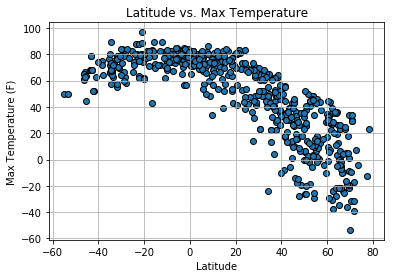

In [13]:
latitude=pd.to_numeric(weather_data.lat)
maxTemp=pd.to_numeric(weather_data.temp)
fahrTemp = (maxTemp * 1.8) + 32
plt.scatter(latitude,fahrTemp,edgecolor='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Max Temperature" )
plt.savefig("latVsTempPlot.png")

Observations on Latitude vs. Max Temperature
 1.Equator (0 latitude) is witnessing highest temperatures between 60F - 85F
 2.As we move farther from the equator temperature variance seem to increase
 3.General observation is temperature is colder as we move away from equator
 

#### Latitude vs. Humidity Plot

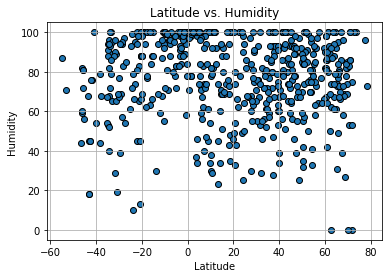

In [10]:
latitude=pd.to_numeric(weather_data.lat)
humidity=pd.to_numeric(weather_data.humidity)
plt.scatter(latitude,humidity,edgecolor='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity" )
plt.savefig("latVsHumidityPlot.png")

Lat Vs Humidity Observations:
There is no direct visible relationship that can be seen between Latitude and Humidity

#### Latitude vs. Cloudiness Plot

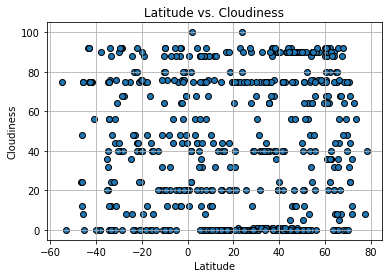

In [11]:
latitude=pd.to_numeric(weather_data.lat)
cloudiness=pd.to_numeric(weather_data.cloudiness)
plt.scatter(latitude,cloudiness,edgecolor='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness" )
plt.savefig("latVsCloudinessPlot.png")

In [ ]:
Latitude vs. Cloudiness Plot Observations:
    There is no direct visible relationship that can be seen between Latitude and Cloudiness 

#### Latitude vs. Wind Speed Plot

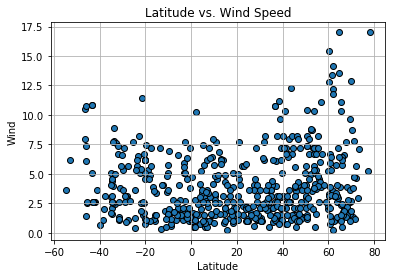

In [12]:
latitude=pd.to_numeric(weather_data.lat)
wind=pd.to_numeric(weather_data.wind)
plt.scatter(latitude,wind,edgecolor='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.title("Latitude vs. Wind Speed" )
plt.savefig("latVsWindSpeed.png")

Latitude vs. Wind Speed Plot Obervations:
    1. As we move towards the North Pole the wind speed increases 
    2. Wind speed is less near the equator
    3. The farther we go the wind speed seem to increase.
    